<a href="https://colab.research.google.com/github/serrve1/test/blob/main/%EC%9D%B4%EC%9E%90%EB%B3%B4%EC%83%81%EB%B0%B0%EC%9C%A8%EB%A0%88%EC%9D%B4%EB%B8%94%EB%A7%81(0%EB%B2%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
# 코랩에서 한글깨짐을 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
path = '/content/drive/MyDrive/프로젝트2/데이터수집/이자보상배율(2011-2022).csv'
df = pd.read_csv(path, encoding='cp949')
df.head()
print(f"전체 기업의 수 기업의 수 : {len(df['거래소코드'].unique())}")
print(f"원본 행의 수 : {len(df)}")


전체 기업의 수 기업의 수 : 2878
원본 행의 수 : 24450


+ 3837개의 기업이 2011~2022까지 상장 폐지된 기업은 제외

In [5]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '[제조]이자보상배율(이자비용)(IFRS)',
       '[제조]* (정상)영업손익(보고서기재)(IFRS)', '[제조]   이자비용(IFRS)',
       '[제조]이자보상배율(이자비용)(IFRS연결)', '[제조]* (정상)영업손익(보고서기재)(IFRS연결)',
       '[제조]   이자비용(IFRS연결)'],
      dtype='object')

In [6]:
df.columns = ['회사명', '거래소코드', '회계년도', '이자보상배율(이자비용)(IFRS)',
       '영업손익(보고서기재)(IFRS)', '이자비용(IFRS)', '이자보상배율(이자비용)(IFRS연결)', '영업손익(보고서기재)(IFRS연결)', '이자비용(IFRS연결)']

In [7]:
ifrs_link = ['회사명', '거래소코드', '회계년도','이자보상배율(이자비용)(IFRS연결)', '영업손익(보고서기재)(IFRS연결)', '이자비용(IFRS연결)']
ifrs_sep = ['회사명', '거래소코드', '회계년도','이자보상배율(이자비용)(IFRS)', '영업손익(보고서기재)(IFRS)', '이자비용(IFRS)']

In [8]:
df_make = df.copy()
import numpy as np
# 연결에서 이자비용이 0인데 개별에서는 0이 아닌경우는 말이 안되기 때문에 결측치로 바꿔주었음
indices_to_change = df_make[(df_make['이자비용(IFRS연결)'] == 0) & (df_make['이자비용(IFRS)'] != 0)].index
df_make.loc[indices_to_change, '이자비용(IFRS연결)'] = np.nan

df_make['이자보상배율_sep'] = df['영업손익(보고서기재)(IFRS)'] / df['이자비용(IFRS)']
df_make['이자보상배율_link'] = df['영업손익(보고서기재)(IFRS연결)'] / df['이자비용(IFRS연결)']
df_make.dropna(subset=['이자보상배율_link', '이자보상배율_sep'], how='all', inplace=True)
df_make = df_make.reset_index(drop=True)
print(f"이자보상배율을 구할 수 있는 기업의 수 : {len(df_make['거래소코드'].unique())}")
print(f"이자보상배율을 구할 수 있는 기업의 수 : {len(df_make)}")

이자보상배율을 구할 수 있는 기업의 수 : 2589
이자보상배율을 구할 수 있는 기업의 수 : 22932


### IFRS 연결 + 개별 --> 연결
### IFRS 개별

In [9]:
df_make['이자보상배율_link'].isnull().sum()

4825

In [10]:
# 1순위는 이자보상배율(연결)이고, 연결이 없는 경우에는 개별을 적용
df_make['이자보상배율'] = df_make['이자보상배율_link']
df_make['이자보상배율'].fillna(df_make['이자보상배율_sep'], inplace = True)

In [11]:
df_make['이자보상배율'].isnull().sum()

0

In [12]:
df_make.columns

Index(['회사명', '거래소코드', '회계년도', '이자보상배율(이자비용)(IFRS)', '영업손익(보고서기재)(IFRS)',
       '이자비용(IFRS)', '이자보상배율(이자비용)(IFRS연결)', '영업손익(보고서기재)(IFRS연결)',
       '이자비용(IFRS연결)', '이자보상배율_sep', '이자보상배율_link', '이자보상배율'],
      dtype='object')

In [13]:
df_make.drop(columns=['거래소코드','이자보상배율(이자비용)(IFRS)','이자보상배율(이자비용)(IFRS연결)','이자보상배율_sep','이자보상배율_link'], inplace=True)

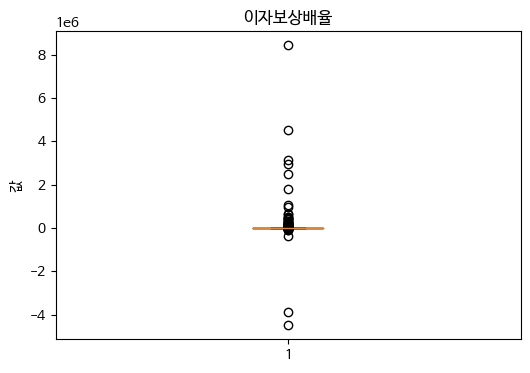

In [14]:
import matplotlib.pyplot as plt

# Box plot 그리기
plt.figure(figsize=(6, 4))
plt.boxplot(df_make['이자보상배율'])
plt.title('이자보상배율')
plt.ylabel('값')
plt.show()

In [15]:
df_make['이자보상배율'].value_counts()

 inf          789
-inf          183
 16.163793      2
 1.684065       2
 3.388924       2
             ... 
 15.206945      1
 11.736485      1
 15.380312      1
 25.145984      1
 85.183579      1
Name: 이자보상배율, Length: 21953, dtype: int64

In [16]:
# inf를 100으로, -inf를 -100으로 대체
df_make.replace([np.inf, -np.inf], [100, -100], inplace=True)

In [17]:
value_counts = df_make['이자보상배율'].value_counts()
filtered_values = value_counts[value_counts == 2]
print(filtered_values)

 16.163793    2
 1.684065     2
 3.388924     2
 4.948890     2
 6.056645     2
 2.836050     2
 5.592839     2
 25.156412    2
-5.681299     2
Name: 이자보상배율, dtype: int64


In [18]:
# 엠씨넥스(2020/12) 등이 중복인 것을 확인
df_make[(df_make['이자보상배율'] >= 16.163793) & (df_make['이자보상배율'] <= 16.2)]

,회사명,회계년도,영업손익(보고서기재)(IFRS),이자비용(IFRS),영업손익(보고서기재)(IFRS연결),이자비용(IFRS연결),이자보상배율
2339,(주)락앤락,2012/12,-878640.0,4118019.0,72099858.0,4455684.0,16.181547
6056,(주)알티캐스트,2017/12,6255842.0,0.0,5739386.0,354901.0,16.171794
7550,(주)엠씨넥스,2020/12,68093623.0,2846225.0,59167162.0,3660475.0,16.163793
7551,(주)엠씨넥스,2020/12,68093623.0,2846225.0,59167162.0,3660475.0,16.163793
8596,(주)위지트,2016/12,4521976.0,248406.0,4053513.0,250306.0,16.194230


In [19]:
# 회사명과 회계연도가 동시에 같은 경우 중복데이터라서 제거
df_make.drop_duplicates(subset=['회사명', '회계년도'], keep='first', inplace=True)
value_counts = df_make['이자보상배율'].value_counts()
filtered_values = value_counts[value_counts == 2]
print(filtered_values)
# 중복 제거

Series([], Name: 이자보상배율, dtype: int64)


In [20]:
#중복된 데이터 제거 확인
df_make[(df_make['이자보상배율'] >= 16.163793) & (df_make['이자보상배율'] <= 16.2)]

,회사명,회계년도,영업손익(보고서기재)(IFRS),이자비용(IFRS),영업손익(보고서기재)(IFRS연결),이자비용(IFRS연결),이자보상배율
2339,(주)락앤락,2012/12,-878640.0,4118019.0,72099858.0,4455684.0,16.181547
6056,(주)알티캐스트,2017/12,6255842.0,0.0,5739386.0,354901.0,16.171794
7550,(주)엠씨넥스,2020/12,68093623.0,2846225.0,59167162.0,3660475.0,16.163793
8596,(주)위지트,2016/12,4521976.0,248406.0,4053513.0,250306.0,16.194230


In [21]:
df2 = df_make.copy()
df2 = df2[['회사명','회계년도','이자보상배율']]

In [22]:
# 그냥 1미만인 것을 확인
df2.loc[df2['이자보상배율'] < 1]

,회사명,회계년도,이자보상배율
1,(주)CMG제약,2012/12,-7.746653
2,(주)CMG제약,2013/12,0.697687
4,(주)CMG제약,2015/12,-32.220569
12,(주)DB하이텍,2011/12,-0.749826
13,(주)DB하이텍,2012/12,-0.311208
...,...,...,...
22926,흥아해운(주),2017/12,-0.424065
22927,흥아해운(주),2018/12,-1.163580
22928,흥아해운(주),2019/12,-0.549389
22929,흥아해운(주),2020/12,-0.376437


In [23]:
import pandas as pd
# 레이블 초기화
df2['레이블'] = 0

# 회사명으로 그룹화하여 각 회사별로 처리
# company는 회사명 : 예를들면 (A회사), group은 'A회사'의 데이터 전부
for company, group in df2.groupby('회사명'):
    counter = 0
    for i in range(len(group)):
        if group['이자보상배율'].iloc[i] < 1:
            counter += 1
        else:
            counter = 0

        if counter == 3:
            df2.loc[group.index[i], '레이블'] = 1
            df2.drop(group.index[i+1:], inplace=True)
            break


In [24]:
df2.reset_index(drop= True, inplace =True)

In [25]:
df2[df2['레이블'] == 1]

,회사명,회계년도,이자보상배율,레이블
14,(주)DB하이텍,2013/12,-0.161400,1
29,(주)HJ중공업,2013/12,-0.396718,1
93,(주)STX,2014/12,0.762237,1
97,(주)TCC스틸,2014/12,0.024863,1
113,(주)강스템바이오텍,2017/12,-8.153866,1
...,...,...,...,...
18629,현우산업(주),2014/12,-2.263430,1
18633,현진소재(주),2014/12,-3.617497,1
18685,화천기계(주),2020/12,-828.368942,1
18766,휴림로봇(주),2014/12,-6.514763,1


In [26]:
len(df2['회사명'].unique())

2564

In [27]:
df2['레이블'].value_counts()

0    17916
1      885
Name: 레이블, dtype: int64

In [28]:
# HJ중공업의 경우 1이후에는 drop한 것을 볼 수 있음
df2.iloc[25:32]

,회사명,회계년도,이자보상배율,레이블
25,(주)ES큐브,2021/12,0.355575,0
26,(주)ES큐브,2022/12,71.353091,0
27,(주)HJ중공업,2011/12,0.546377,0
28,(주)HJ중공업,2012/12,0.273839,0
29,(주)HJ중공업,2013/12,-0.396718,1
30,(주)MH에탄올,2011/12,0.117479,0
31,(주)MH에탄올,2012/12,1.080513,0


In [29]:
# 흥아해운
df2.iloc[-8:]

,회사명,회계년도,이자보상배율,레이블
18793,흥아해운(주),2011/12,-0.329571,0
18794,흥아해운(주),2012/12,1.856622,0
18795,흥아해운(주),2013/12,1.147868,0
18796,흥아해운(주),2014/12,1.115251,0
18797,흥아해운(주),2015/12,1.023617,0
18798,흥아해운(주),2016/12,0.213309,0
18799,흥아해운(주),2017/12,-0.424065,0
18800,흥아해운(주),2018/12,-1.163580,1


In [30]:
# 강스템바이오텍의 경우 정상적으로 레이블 부여됨 이후 drop, 강원에너지의 경우도 마찬가지
df2.iloc[110:140]

,회사명,회계년도,이자보상배율,레이블
110,(주)가온칩스,2022/12,73.877375,0
111,(주)강스템바이오텍,2015/12,-5.406979,0
112,(주)강스템바이오텍,2016/12,-18.893795,0
113,(주)강스템바이오텍,2017/12,-8.153866,1
114,(주)강원랜드,2011/12,1142.605326,0
115,(주)강원랜드,2012/12,565.684380,0
116,(주)강원랜드,2013/12,1421.808161,0
117,(주)강원랜드,2014/12,2073.715689,0
118,(주)강원랜드,2015/12,2623.810834,0
119,(주)강원랜드,2016/12,836.022185,0


In [31]:
df2.to_csv('/content/drive/MyDrive/프로젝트2/이자보상배율레이블링.csv', index=True)